[Reference](https://towardsdatascience.com/6-visualization-tricks-to-handle-ultra-long-time-series-data-57dad97e0fc2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/dly532.csv')
df['date'] = pd.to_datetime(df['date'])
df.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
29458,2022-08-27,0,19.9,0,6.6,0,3.7,3,0.0,1011.2,...,16,11.5,0,1882,17.875,2.6,3.5,59.4,59.4,63.8
29459,2022-08-28,0,17.8,0,9.8,0,6.7,2,0.0,1012.8,...,17,0.0,0,819,17.3,1.5,2,60.1,60.1,64.5
29460,2022-08-29,0,21.5,0,12.0,0,9.6,3,0.0,1014.3,...,19,7.7,0,1579,18.45,2.5,3.5,61.2,61.2,65.6
29461,2022-08-30,0,19.1,0,10.5,0,9.2,3,0.0,1016.8,...,19,8.1,0,1754,18.65,2.4,3.4,62.2,62.2,66.7
29462,2022-08-31,0,18.2,0,8.4,0,4.7,0,0.1,1017.2,...,20,8.5,0,1638,17.775,2.1,3.1,63,63,67.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29463 entries, 0 to 29462
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    29463 non-null  datetime64[ns]
 1   ind     29463 non-null  int64         
 2   maxtp   29463 non-null  float64       
 3   ind.1   29463 non-null  int64         
 4   mintp   29463 non-null  float64       
 5   igmin   29463 non-null  int64         
 6   gmin    29463 non-null  object        
 7   ind.2   29463 non-null  int64         
 8   rain    29463 non-null  float64       
 9   cbl     29463 non-null  float64       
 10  wdsp    29463 non-null  float64       
 11  ind.3   29463 non-null  int64         
 12  hm      29463 non-null  object        
 13  ind.4   29463 non-null  int64         
 14  ddhm    29463 non-null  object        
 15  ind.5   29463 non-null  int64         
 16  hg      29463 non-null  object        
 17  sun     29463 non-null  float64       
 18  dos   

In [4]:
start = pd.Timestamp('1990-01-01')
end = pd.Timestamp('2021-12-31')
df_temp = df[(df['date']>=start)&(df['date']<=end)][['date','maxtp','mintp']]
df_temp.reset_index(drop=True, inplace=True)

#create an average temperature column
df_temp['meantp'] = [(i+j)/2 for i,j in zip(df_temp.maxtp, df_temp.mintp)]
df_temp.head()

,date,maxtp,mintp,meantp
0,1990-01-01,9.7,4.3,7.00
1,1990-01-02,10.0,5.6,7.80
2,1990-01-03,8.3,4.6,6.45
3,1990-01-04,11.7,3.7,7.70
4,1990-01-05,11.1,4.6,7.85


In [5]:
df_temp['month'] = pd.DatetimeIndex(df_temp['date']).month
df_temp['year'] = pd.DatetimeIndex(df_temp['date']).year
df_temp['month_year'] = [str(i)+'-'+str(j) for i,j in zip(df_temp.year, df_temp.month)]
df_temp.head()

,date,maxtp,mintp,meantp,month,year,month_year
0,1990-01-01,9.7,4.3,7.00,1,1990,1990-1
1,1990-01-02,10.0,5.6,7.80,1,1990,1990-1
2,1990-01-03,8.3,4.6,6.45,1,1990,1990-1
3,1990-01-04,11.7,3.7,7.70,1,1990,1990-1
4,1990-01-05,11.1,4.6,7.85,1,1990,1990-1


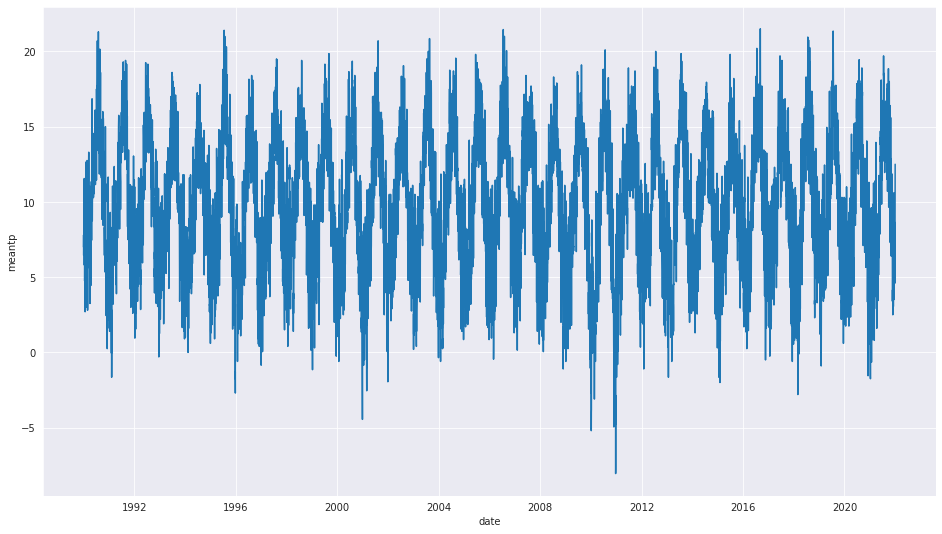

In [6]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
sns.lineplot(data=df_temp, y='meantp', x ='date')
plt.show()

In [7]:
px.line(df_temp, x='date', y='meantp')

In [8]:
df_dot = df_temp[(df_temp['meantp']>=20.5)|(df_temp['meantp']<=-5)]
fig = px.line(df_temp, x='date', y='meantp')
fig.add_trace(go.Scatter(x =df_dot.date, y=df_dot.meantp,
                         mode='markers',
                         marker=dict(color='red', size=6)))
fig.update_layout(showlegend=False)

In [9]:
fig = px.line(df_temp, x='date', y='meantp')
fig.add_hline(y=20, line_width=1.5,
              line_dash='dash', line_color='red')
fig.add_hline(y=-5, line_width=1.5,
              line_dash='dash', line_color='red')
fig.update_layout(showlegend=False)

In [10]:
px.box(df_temp, x='month_year', y='meantp')

In [11]:
df_mean = df_temp.groupby(['year','month']).mean().reset_index()
df_mean.head()

,year,month,maxtp,mintp,meantp
0,1990,1,9.970968,4.429032,7.200000
1,1990,2,10.125000,4.185714,7.155357
2,1990,3,11.932258,5.558065,8.745161
3,1990,4,12.206667,3.833333,8.020000
4,1990,5,16.496774,8.387097,12.441935


In [12]:
df_cross = df_mean.set_index(['year','month'])['meantp'].unstack()
df_cross

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1990,7.200000,7.155357,8.745161,8.020000,12.441935,13.081667,15.803226,16.656452,12.671667,11.474194,7.503333,5.161290
1991,4.440323,3.712500,7.875806,7.753333,11.654839,12.195000,15.998387,16.229032,14.090000,9.848387,6.898333,7.027419
1992,5.856452,7.110345,7.895161,8.428333,12.225806,15.105000,15.606452,14.337097,12.295000,7.762903,7.915000,5.417742
1993,6.930645,6.973214,7.264516,9.723333,10.262903,14.086667,14.777419,14.330645,12.220000,8.358065,6.760000,5.682258
1994,5.585484,4.625000,7.456452,7.545000,9.190323,12.841667,14.729032,13.806452,11.608333,9.851613,9.358333,6.656452
1995,4.622581,6.021429,5.243548,8.331667,10.204839,13.115000,16.254839,17.356452,12.660000,12.380645,7.693333,4.514516
1996,5.983871,3.798276,4.843548,8.241667,8.491935,13.045000,14.916129,14.325806,12.928333,10.874194,5.671667,4.222581
1997,4.212903,6.212500,7.725806,8.843333,9.895161,12.308333,15.033871,15.975806,13.011667,10.503226,8.265000,6.382258
1998,5.645161,7.873214,7.780645,6.816667,11.345161,13.033333,14.419355,14.922581,13.296667,10.140323,6.933333,6.011290


In [13]:
px.imshow(df_cross, height=700, aspect='auto',
          color_continuous_scale='viridis')

In [14]:
months = [str(i) for i in list(set(df_mean.month))] + ['1']
years = list(set(df_mean.year))
pal = list(sns.color_palette(palette='viridis',
                             n_colors=len(years)).as_hex())

In [15]:
fig = go.Figure()
for i,c in zip(years,pal):
    df = df_mean[df_mean['year']==i]
    val = list(df.meantp)*2
    fig.add_trace(go.Scatterpolar(r=val, theta=months,
                                  name=i, marker=dict(color=c)))
fig.update_layout(height=800)